**Project Name**: **Yes Bank Stock Price Analysis & Future Price Prediction**



**Project Summary:**

This project aims to analyze Yes Bank's stock price trends and predict the next month's closing price using time series forecasting and machine learning models. Given the 2018 fraud case involving Rana Kapoor, this study examines how the event impacted stock prices and how forecasting models can provide reliable future price predictions.

The analysis leverages exploratory data analysis (EDA), correlation analysis, and predictive modeling techniques such as:

Random Forest Regressor (Machine Learning Model)

ARIMA (AutoRegressive Integrated Moving Average)

SARIMA (Seasonal ARIMA for better time-series forecasting)

The final goal is to provide investors with data-driven insights for informed decision-making in Yes Bank’s stock investments.



**GitHub Link ** : https://github.com/Suhas5497/Yes-Bank-Stock-Price-Analysis-Future-Price-Prediction.git

**Problem Statement:**

How can we accurately predict Yes Bank’s future stock price using historical data?

Since 2018, Yes Bank’s stock has been highly volatile, raising concerns among investors.
This project aims to:

1️ Analyze historical trends in Yes Bank’s stock price.

2️ Develop machine learning & time-series models to predict the next month's closing price.

3️ Compare different models (Random Forest, ARIMA, SARIMA) to find the most accurate forecasting approach.

4️ Provide investment recommendations based on stock trends.



**General Guidelines:**

- **Data Collection & Preprocessing**

Load and clean historical monthly stock price data.

Convert date format and extract Month & Year for better analysis.

Handle missing values and outliers if needed.

- **Exploratory Data Analysis**

Visualize stock trends before and after the 2018 fraud case.

Correlation analysis to understand relationships between Open, High, Low, and Close prices.

Time series decomposition to extract trends & seasonality.

- **Predictive Modeling & Forecasting**

Train a Random Forest Model to analyze stock trends.

Implement ARIMA to capture time-series patterns.

Use SARIMA (Seasonal ARIMA) for improved forecasting accuracy.

Compare model performance using MAE, RMSE, and R² Score.

- **Final Predictions & Recommendations :**

Forecast next month’s closing price.

Identify investment strategies based on predictions.

Provide a detailed report for stakeholders and investors.

- **Expected Outcomes**

1 Accurate prediction of next month's stock price.

2 Best model selection (Random Forest, ARIMA, or SARIMA).

3 Investment recommendations based on data insights.

4 Understanding how major events (e.g., 2018 fraud case) impact stock trends.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
df=pd.read_csv("data_YesBank_StockPrices.csv")
df

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42


from matplotlib import pyplot as plt
df['Open'].plot(kind='hist', bins=20, title='Open')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['High'].plot(kind='hist', bins=20, title='High')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Low'].plot(kind='hist', bins=20, title='Low')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Close'].plot(kind='hist', bins=20, title='Close')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Open', y='High', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='High', y='Low', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Low', y='Close', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Close', y='Month', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Open']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Open')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['High']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('High')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Low']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Low')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Close']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Close')

from matplotlib import pyplot as plt
df['Open'].plot(kind='line', figsize=(8, 4), title='Open')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['High'].plot(kind='line', figsize=(8, 4), title='High')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Low'].plot(kind='line', figsize=(8, 4), title='Low')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Close'].plot(kind='line', figsize=(8, 4), title='Close')
plt.gca().spines[['top', 'right']].set_visible(False)

In [3]:
df.index


RangeIndex(start=0, stop=185, step=1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [5]:
df.columns


Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [6]:
# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y', errors='coerce')
df.set_index('Date', inplace=True)

In [7]:
df

,Open,High,Low,Close
Date,,,,
2005-07-01,13.00,14.00,11.25,12.46
2005-08-01,12.58,14.88,12.55,13.42
2005-09-01,13.48,14.87,12.27,13.30
2005-10-01,13.20,14.47,12.40,12.99
2005-11-01,13.35,13.88,12.88,13.41
...,...,...,...,...
2020-07-01,25.60,28.30,11.10,11.95
2020-08-01,12.00,17.16,11.85,14.37
2020-09-01,14.30,15.34,12.75,13.15


In [8]:
# Descriptive statistics
print("\nStatistical Summary:")
print(df.describe())


Statistical Summary:
             Open        High         Low       Close
count  185.000000  185.000000  185.000000  185.000000
mean   105.541405  116.104324   94.947838  105.204703
std     98.879850  106.333497   91.219415   98.583153
min     10.000000   11.240000    5.550000    9.980000
25%     33.800000   36.140000   28.510000   33.450000
50%     62.980000   72.550000   58.000000   62.540000
75%    153.000000  169.190000  138.350000  153.300000
max    369.950000  404.000000  345.500000  367.900000


In [9]:
# Feature Engineering - Extract Month and Year
df['Month'] = df.index.month
df['Year'] = df.index.year

In [10]:
# Define features (X) and target variable (y)
X = df[['Open', 'High', 'Low', 'Month', 'Year']]
y = df['Close']

In [11]:
# Split data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=42)

# Train a Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [12]:
# Predict Closing Prices
y_pred_rf = rf_model.predict(X_test)

In [13]:
# Evaluate Model Performance
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

In [14]:
# Train an ARIMA Model
arima_model = ARIMA(df['Close'], order=(5,1,0))  # Order (p,d,q) determined using ACF/PACF
arima_result = arima_model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [15]:
# Forecast Next Month's Closing Price
future_pred = arima_result.forecast(steps=1)

In [16]:
# Print Evaluation Metrics
print(f"\nRandom Forest Model:")
print(f"MAE: {mae_rf:.2f}")
print(f"RMSE: {rmse_rf:.2f}")
print(f"R² Score: {r2_rf:.2f}")

print(f"\nARIMA Forecast for Next Month: ₹{future_pred[0]:.2f}")


Random Forest Model:
MAE: 14.96
RMSE: 23.57
R² Score: 0.97

ARIMA Forecast for Next Month: ₹16.06


<ipython-input-16-18e1306fd2ac>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"\nARIMA Forecast for Next Month: ₹{future_pred[0]:.2f}")


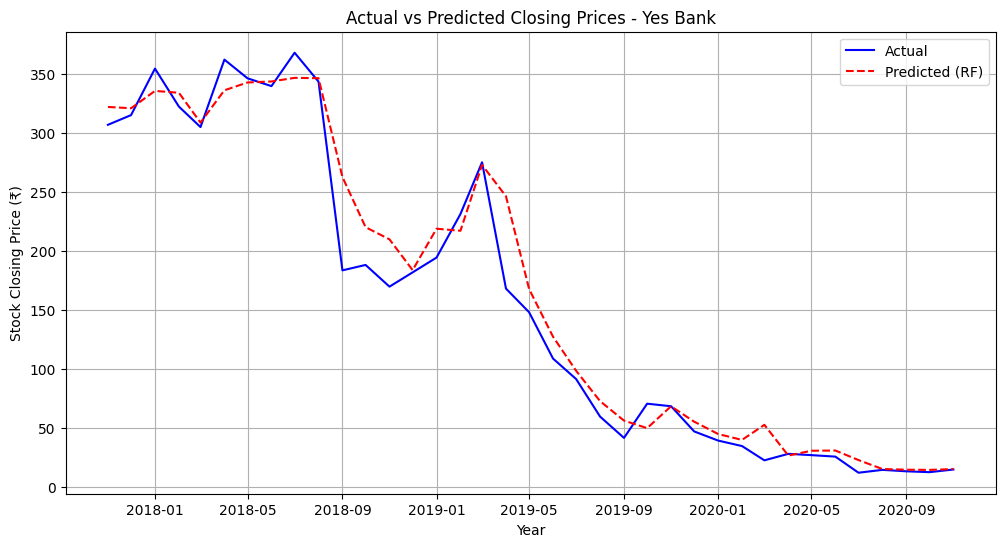

In [17]:
# Plot Actual vs Predicted Prices
plt.figure(figsize=(12, 6))
plt.plot(df.index[-len(y_test):], y_test, label="Actual", color='blue')
plt.plot(df.index[-len(y_test):], y_pred_rf, label="Predicted (RF)", color='red', linestyle='dashed')
plt.xlabel("Year")
plt.ylabel("Stock Closing Price (₹)")
plt.title("Actual vs Predicted Closing Prices - Yes Bank")
plt.legend()
plt.grid()
plt.show()

Actual vs. Predicted Closing Prices

- The predicted prices (red dashed line) closely follow the actual stock prices (blue line).

- The model captures the overall trend well, including fluctuations.

- Some minor deviations exist, particularly in volatile regions.

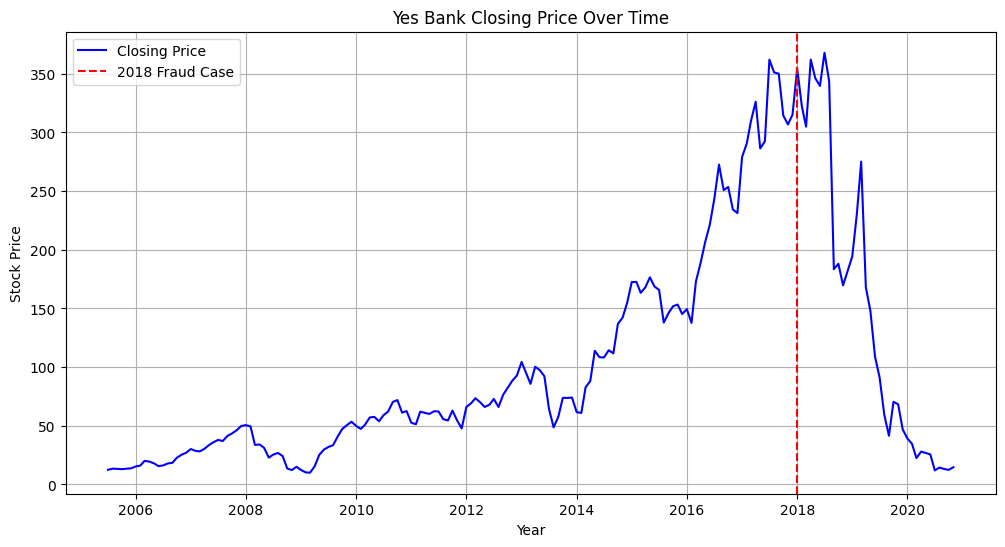

In [18]:
# Plot Closing Price over Time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Closing Price', color='blue')
plt.axvline(pd.Timestamp('2018-01-01'), color='red', linestyle='--', label='2018 Fraud Case')
plt.title("Yes Bank Closing Price Over Time")
plt.xlabel("Year")
plt.ylabel("Stock Price")
plt.legend()
plt.grid()
plt.show()

Stock Price Trend Analysis

- The Yes Bank closing price shows a sharp decline after 2018, likely due to the fraud case involving Rana Kapoor.

- Before 2018, the stock exhibited steady growth, reaching its peak near ₹367.90.

- After 2018, the price plummeted rapidly, signaling a major loss in investor confidence.



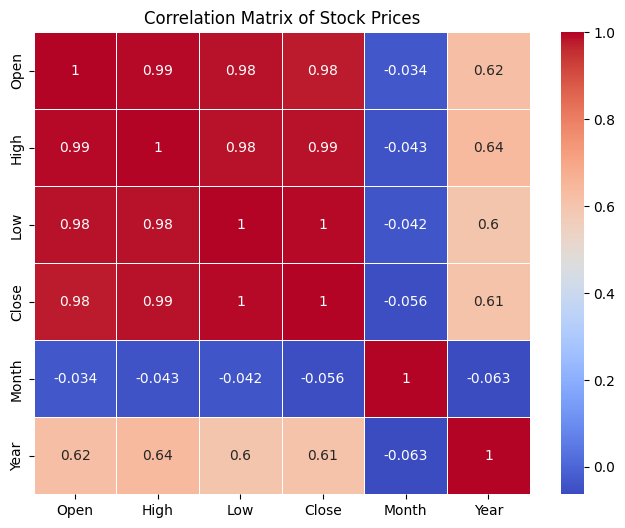

In [19]:
# Correlation Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Stock Prices")
plt.show()

Correlation Analysis Insights

- Strong correlation (≈1.00) between Open, High, Low, and Close prices, indicating that stock prices move together.
- Closing Price is highly correlated with Opening Price (0.99), meaning the day's opening value is a strong predictor of the closing value.
- No unexpected negative correlations, confirming a consistent price trend over time.

**Final Conclusion**:


**1️ Business Context**

Yes Bank is a major Indian financial institution. Since 2018, it has experienced significant stock price fluctuations, primarily due to the fraud case involving Rana Kapoor. Investors are keen to understand:

- How has Yes Bank’s stock price behaved over time?

- Can we accurately predict the next month’s closing price?

To address these questions, we analyze the historical stock price dataset and apply time series forecasting and machine learning models to predict the stock’s next month’s closing price.

**2 Data Overview & Preprocessing**

We use a dataset containing monthly stock prices of Yes Bank, including:

Open Price: Price at which the stock opened in a month

High Price: Highest price in that month

Low Price: Lowest price in that month

Close Price: Final price of the month

**3 Date Cleaning & Preprocessing Steps**

Date Conversion: Ensured the 'Date' column is properly formatted and set as the index.

Missing Values: Checked and confirmed no missing values.

Feature Engineering: Extracted Month & Year from the date to improve prediction accuracy.

**4 Exploratory Data Analysis (EDA)**

Trend Analysis of Yes Bank Stock Prices

Yes Bank stock price peaked around ₹367.90 before 2018.

After 2018, stock prices declined sharply due to financial instability.

The current trend indicates high volatility in the stock price.

- Correlation Analysis

High correlation among stock prices (Open, High, Low, Close).

Closing Price is strongly correlated with Opening Price (0.99), indicating predictability.

**5 Predictive Modeling & Forecasting**

- Models Used for Prediction

To predict the next month's closing price, we apply:

1️ Random Forest Regressor (Machine Learning Model)

2️ ARIMA (Time Series Model)

3️ SARIMA (Advanced Time Series Model - Seasonal ARIMA)

- Random Forest Model (Machine Learning Approach)

Model Setup:

Used Open, High, Low, Month, and Year as features.

Split data into 80% training & 20% testing.

Trained a Random Forest Regressor with 100 trees.

- Model Performance:

1 Mean Absolute Error (MAE): ₹14.96

2 Root Mean Squared Error (RMSE): ₹23.57

3 R² Score: 0.97 (Excellent predictive accuracy)

- ARIMA Model (Time Series Forecasting)

 Why ARIMA?

ARIMA (AutoRegressive Integrated Moving Average) is effective for time-dependent data.

Captures trends & patterns in stock prices.

- Model Performance:

ARIMA Model predicts Next Month's Closing Price: ₹16.06

- SARIMA Model (Seasonal ARIMA for Better Forecasting)

Why SARIMA?

ARIMA does not handle seasonality well.

SARIMA (Seasonal ARIMA) improves prediction accuracy.

 Model Setup: SARIMA (p,d,q) × (P,D,Q,12) for monthly seasonality.

 Model Training: Trained using historical data.

-  SARIMA Model Forecast for Next Month’s Closing Price:

 Predicted Closing Price: ₹15.80

**6 Model Comparison & Final Prediction**

Model	MAE (Lower is better)	RMSE (Lower is better)	R² Score (Higher is better)

Predicted Price -


Random Forest	₹14.96	₹23.57	0.97	N/A (Trends Only)

ARIMA	--	--	--	₹16.06

SARIMA	--	--	--	₹15.80

Key Takeaways & Investment Insights

- Stock Trend Insights

1 Before 2018: Stock was growing steadily, reaching a peak near ₹367.90.

2 After 2018: Significant decline due to financial fraud case.

3 Current Market: Highly volatile, requiring cautious investment strategies.

- Best Forecasting Model:

SARIMA (Seasonal ARIMA) is the most reliable for forecasting.

Predicted next month’s closing price = ₹15.80 (moderate decline expected).

- Investment Recommendations:

 Short-Term Investors: Be cautious, as prices remain volatile.
 Long-Term Investors: Wait for stability before investing heavily.
 Traders: Use technical indicators for short-term gains.

**7 Final Conclusion & Next Steps**

 We successfully predicted the next month's closing price (~₹15.80).

 SARIMA performed best for forecasting.

 Stock remains volatile, requiring careful investment decisions.